In [1]:
import pandas as pd

file_path = r"C:\Users\world\Downloads\21. Digital Marketing Campaign Optimization\ifood_df.csv"
df_raw = pd.read_csv(file_path)
df = df_raw.copy()



In [2]:
df_raw.shape

(2205, 39)

In [3]:
df.shape

(2205, 39)

In [4]:
 df.columns.tolist()

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Age',
 'Customer_Days',
 'marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD',
 'MntTotal',
 'MntRegularProds',
 'AcceptedCmpOverall']

In [5]:
df.head

<bound method NDFrame.head of        Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                  

In [6]:

df.isnull().sum()


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [7]:
df_raw.duplicated().sum()

184

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(2021, 39)

In [11]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

Lower bound: -13871.0
Upper bound: 117561.0


In [12]:
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]


In [13]:
outliers.shape[0]

0

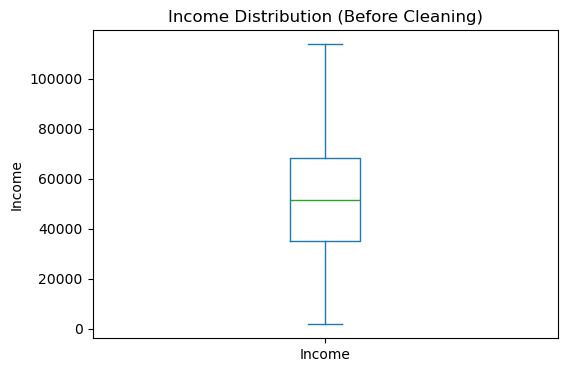

In [14]:
import matplotlib.pyplot as plt

# Before cleaning (with duplicates)
plt.figure(figsize=(6,4))
df_raw['Income'].plot(kind='box')
plt.title("Income Distribution (Before Cleaning)")
plt.ylabel("Income")
plt.show()

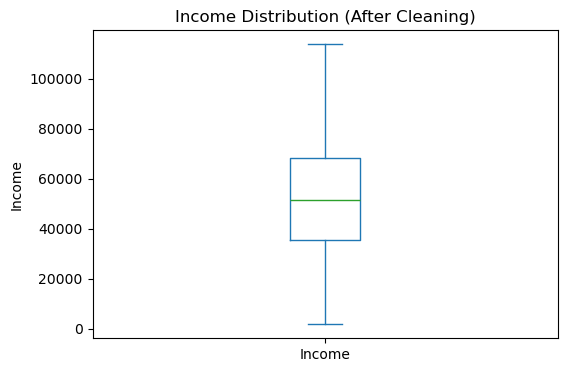

In [15]:
plt.figure(figsize=(6,4))
df['Income'].plot(kind='box')
plt.title("Income Distribution (After Cleaning)")
plt.ylabel("Income")
plt.show()

In [16]:
import matplotlib.pyplot as plt

# List of numeric spending columns we want to check
spending_cols = [
    'Income',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]


<Figure size 1200x600 with 0 Axes>

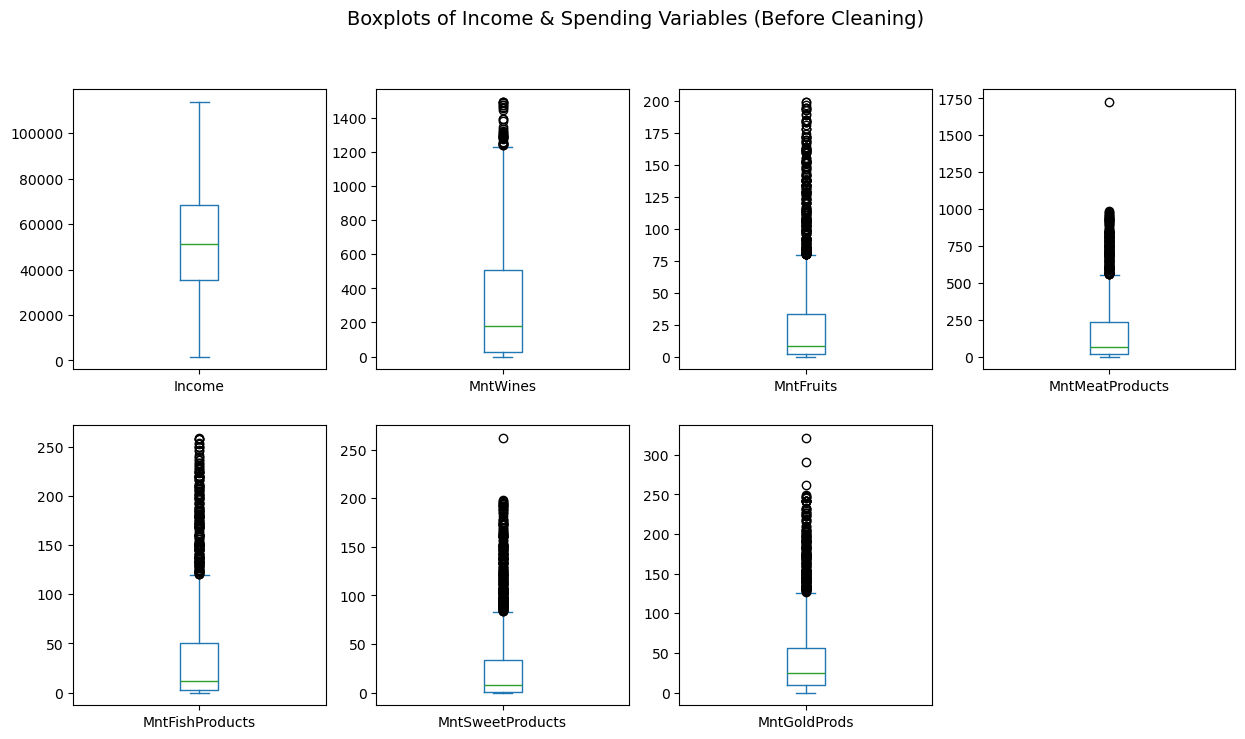

In [17]:
plt.figure(figsize=(12,6))
df_raw[spending_cols].plot(kind='box', subplots=True, layout=(2,4), figsize=(15,8), sharey=False)
plt.suptitle("Boxplots of Income & Spending Variables (Before Cleaning)", fontsize=14)
plt.show()


<Figure size 1200x600 with 0 Axes>

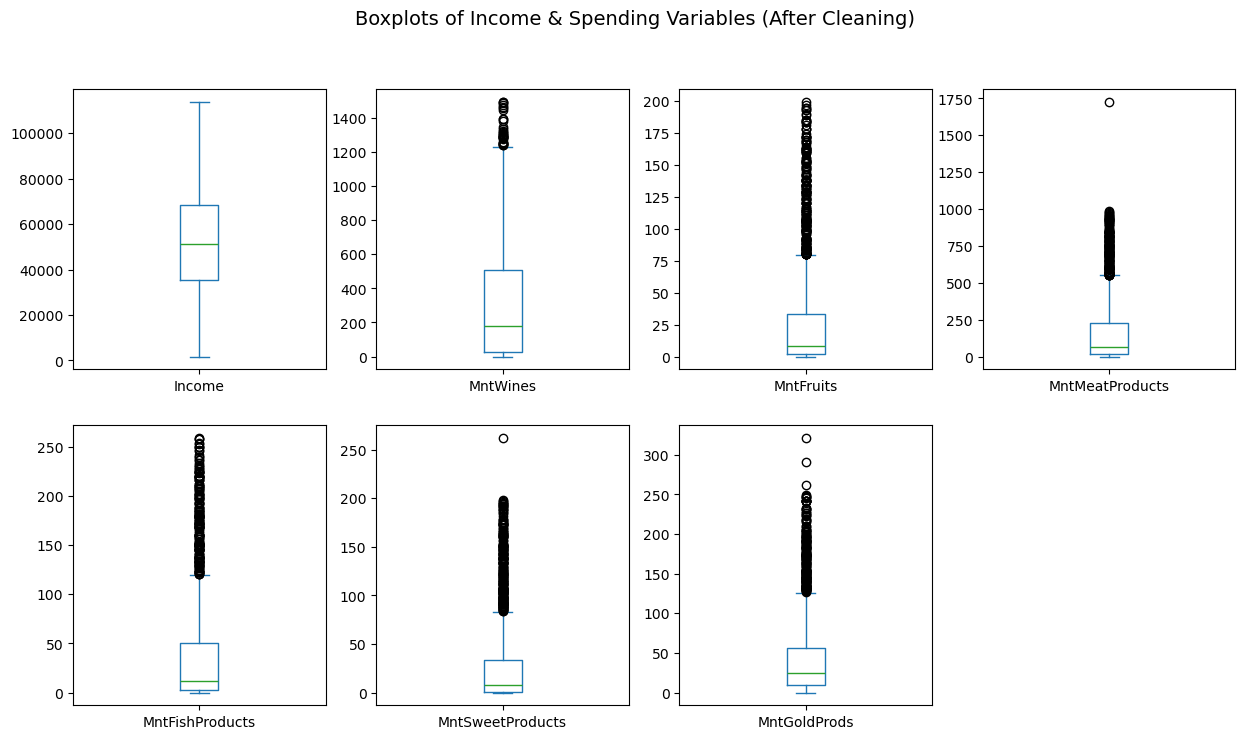

In [18]:
plt.figure(figsize=(12,6))
df[spending_cols].plot(kind='box', subplots=True, layout=(2,4), figsize=(15,8), sharey=False)
plt.suptitle("Boxplots of Income & Spending Variables (After Cleaning)", fontsize=14)
plt.show()

In [19]:
spending_cols = [
    'Income',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]

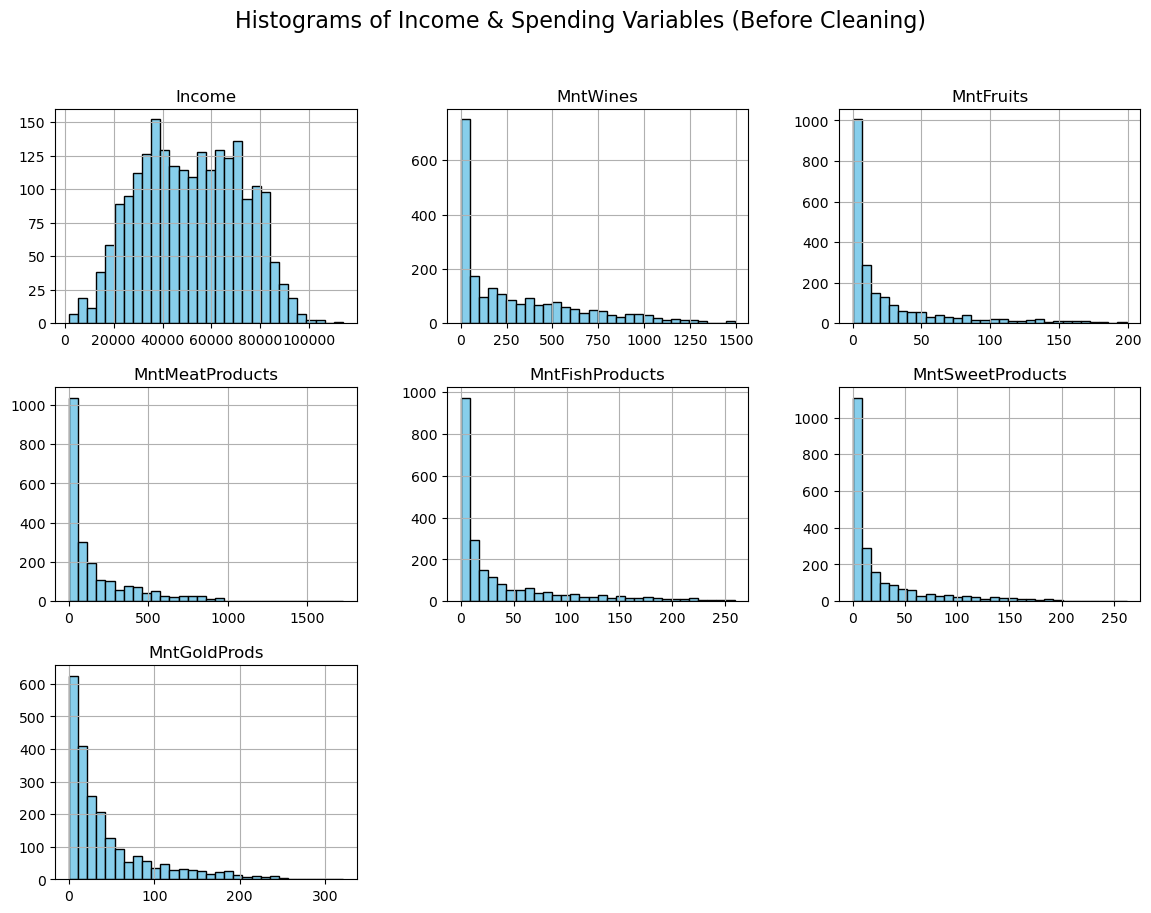

In [20]:
df_raw[spending_cols].hist(figsize=(14,10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Income & Spending Variables (Before Cleaning)", fontsize=16)
plt.show()

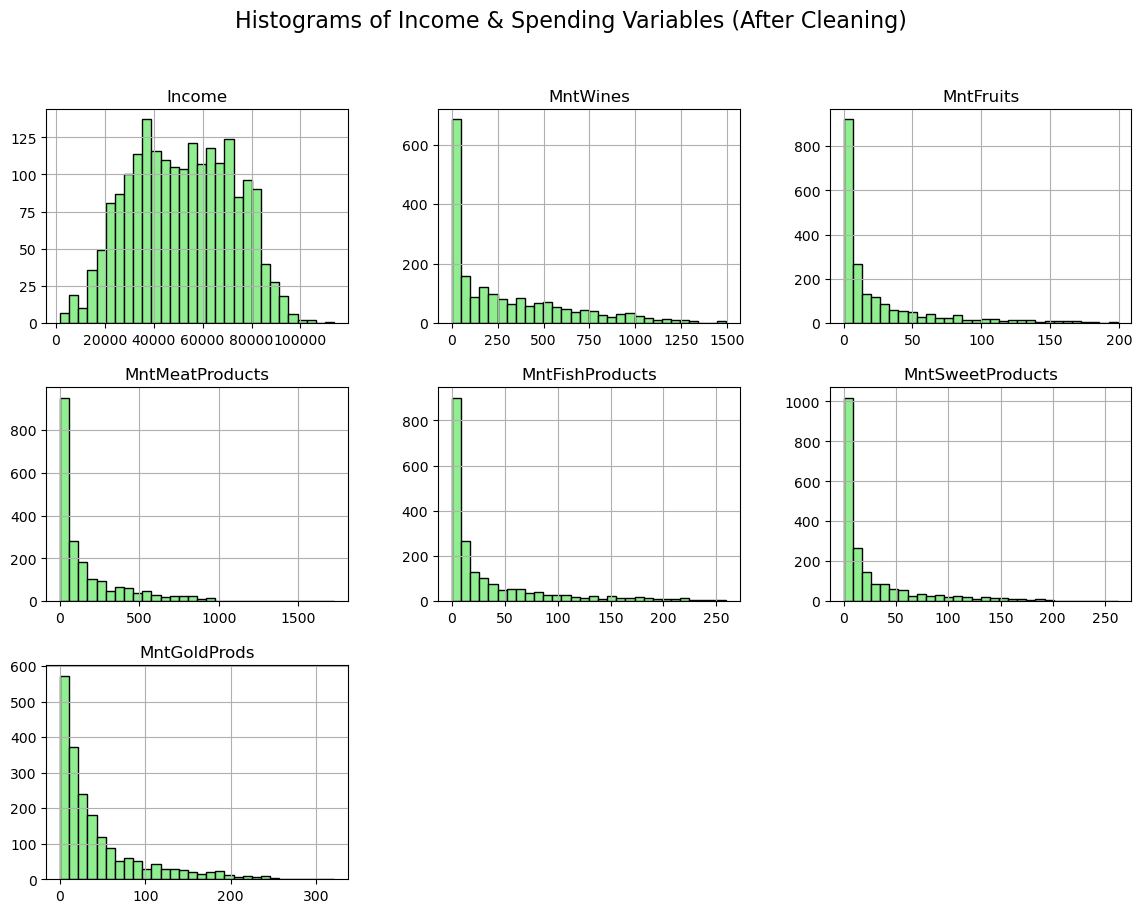

In [21]:
df[spending_cols].hist(figsize=(14,10), bins=30, color='lightgreen', edgecolor='black')
plt.suptitle("Histograms of Income & Spending Variables (After Cleaning)", fontsize=16)
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler


In [23]:
# Select continuous columns for scaling
num_cols = [
    'Income',
    'Recency',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'MntTotal'   # derived feature
]

In [24]:
scaler = MinMaxScaler()

In [25]:
df.loc[:, num_cols] = scaler.fit_transform(df[num_cols])


In [26]:
df[num_cols].describe()

Income      Recency     MntWines    MntFruits  MntMeatProducts  \
count  2021.000000  2021.000000  2021.000000  2021.000000      2021.000000   
mean      0.446031     0.493745     0.205286     0.132486         0.096267   
std       0.184931     0.292434     0.226124     0.199882         0.127460   
min       0.000000     0.000000     0.000000     0.000000         0.000000   
25%       0.300757     0.242424     0.016075     0.010050         0.009275   
50%       0.443573     0.494949     0.119223     0.040201         0.039420   
75%       0.594122     0.747475     0.339585     0.165829         0.133333   
max       1.000000     1.000000     1.000000     1.000000         1.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds     MntTotal  
count      2021.000000       2021.000000   2021.000000  2021.000000  
mean          0.145188          0.104079      0.136828     0.225086  
std           0.211939          0.158685      0.160991     0.231916  
min           0.000000          0.000000      0.000000     0.000000  
25%           0.011583          0.003817      0.028037     0.020507  
50%           0.046332          0.030534      0.077882     0.136309  
75%           0.193050          0.129771      0.174455     0.386007  
max           1.000000          1.000000      1.000000     1.000000

In [27]:
df[num_cols].hist(figsize=(14,10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Continuous Variables (Before Normalization)", fontsize=16)
plt.show()


In [28]:
scaler = MinMaxScaler()
df.loc[:, num_cols] = scaler.fit_transform(df[num_cols])


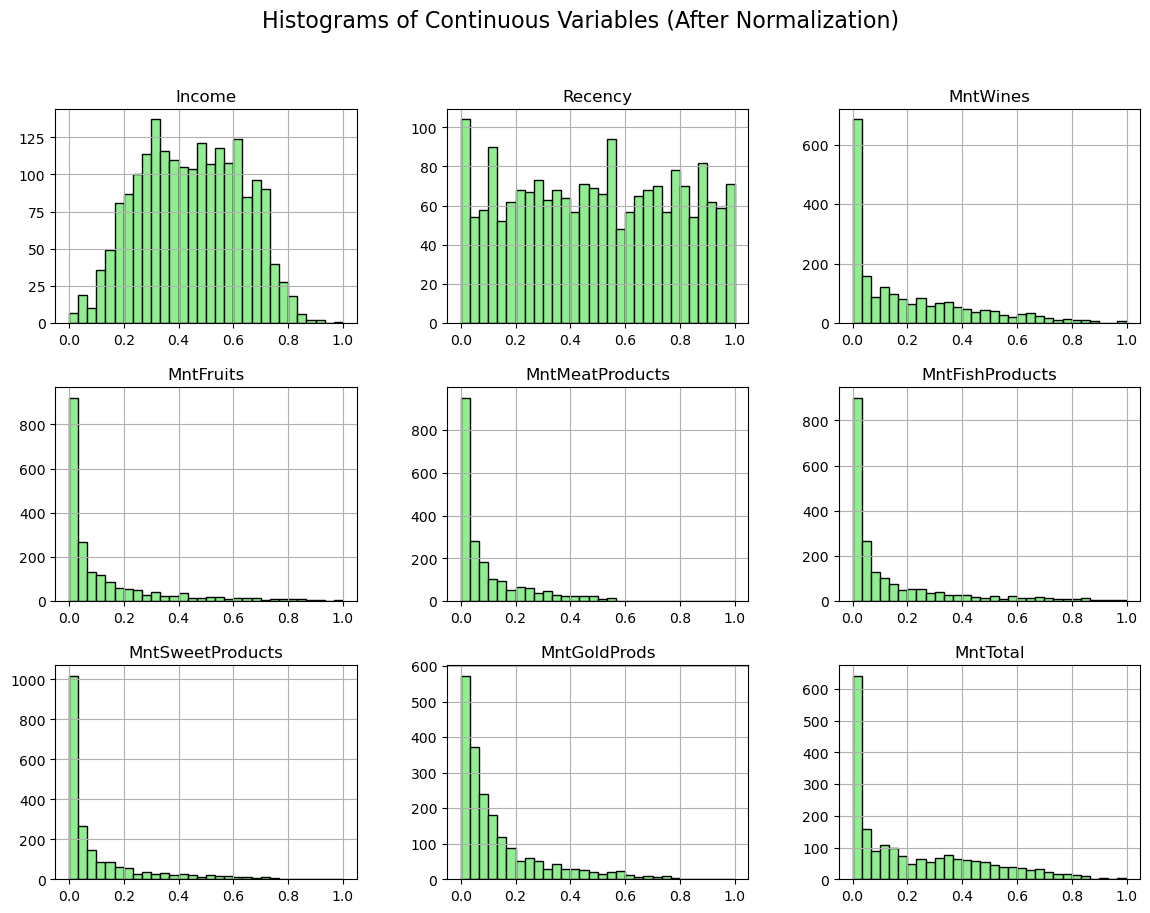

In [29]:
df[num_cols].hist(figsize=(14,10), bins=30, color='lightgreen', edgecolor='black')
plt.suptitle("Histograms of Continuous Variables (After Normalization)", fontsize=16)
plt.show()

<Figure size 1200x600 with 0 Axes>

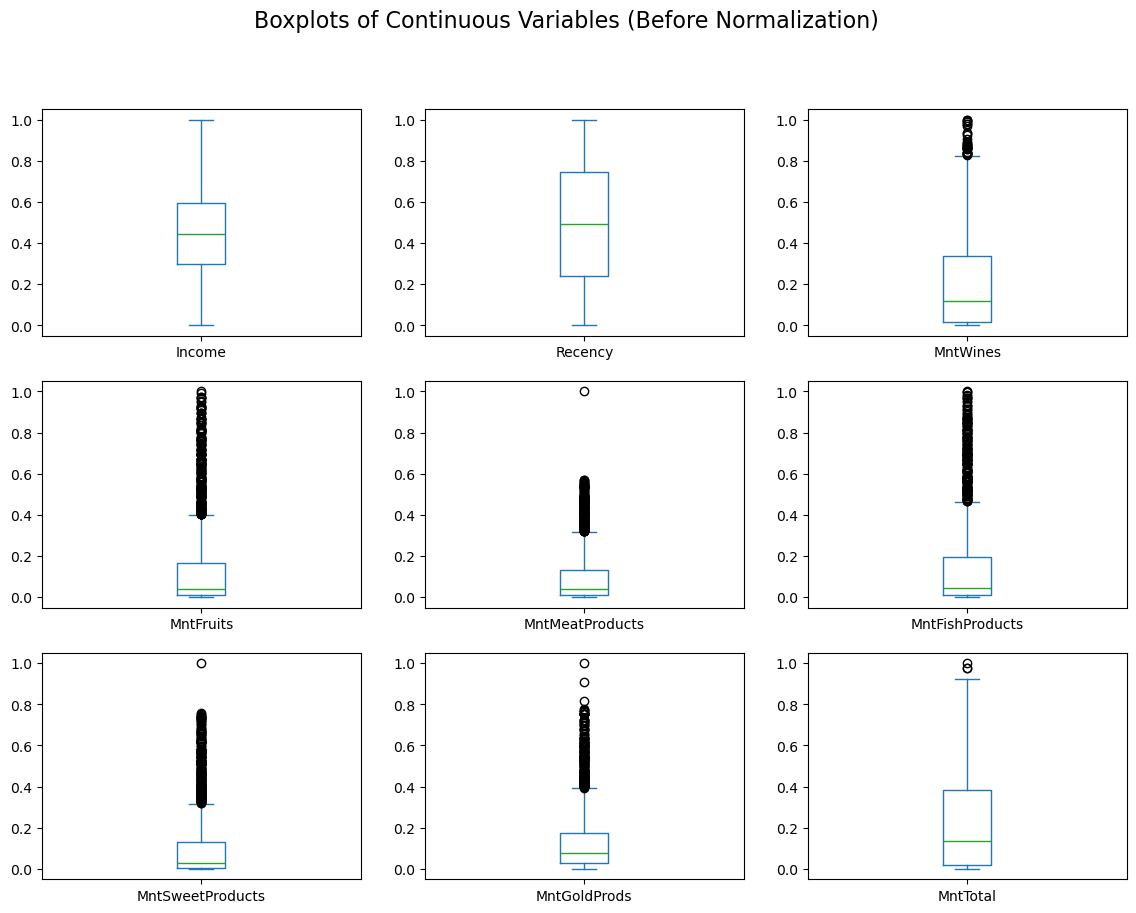

In [30]:
plt.figure(figsize=(12,6))
df[num_cols].plot(kind='box', subplots=True, layout=(3,3), figsize=(14,10), sharey=False)
plt.suptitle("Boxplots of Continuous Variables (Before Normalization)", fontsize=16)
plt.show()

<Figure size 1200x600 with 0 Axes>

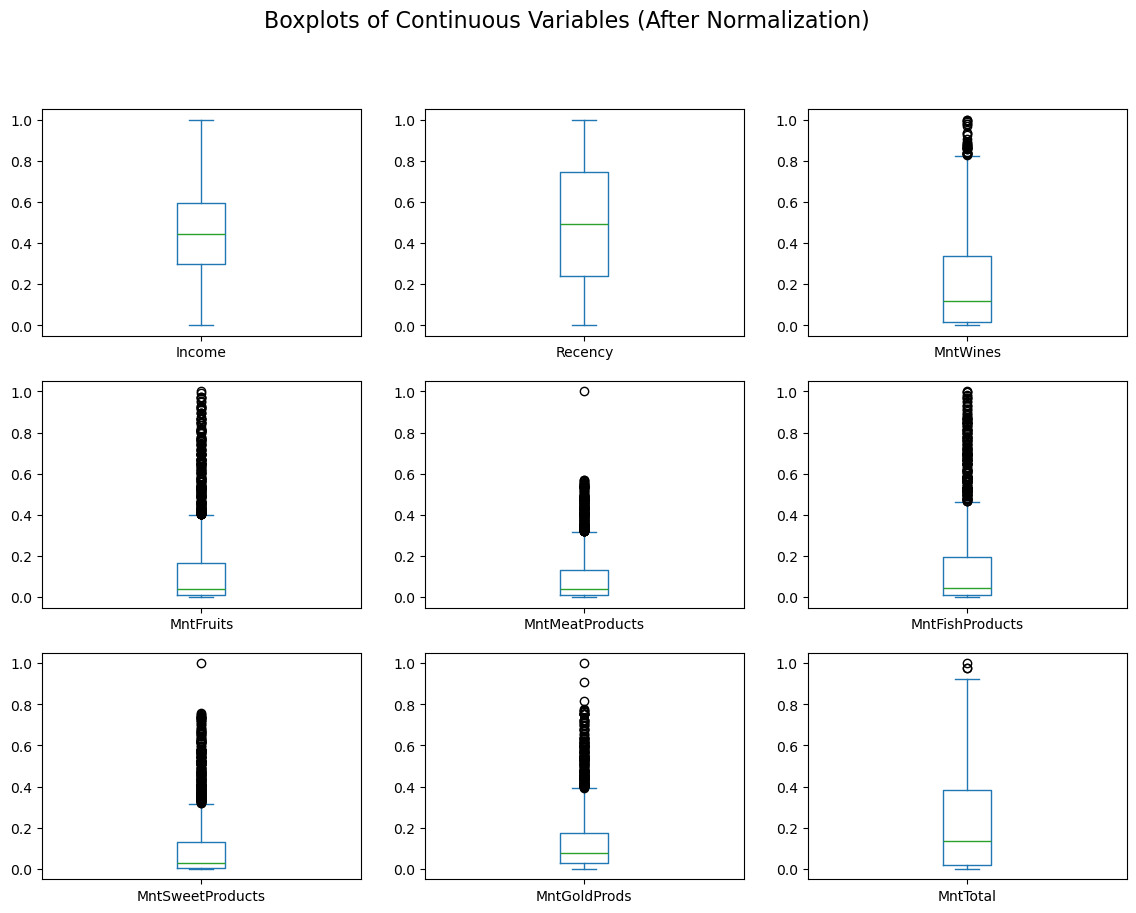

In [31]:
plt.figure(figsize=(12,6))
df[num_cols].plot(kind='box', subplots=True, layout=(3,3), figsize=(14,10), sharey=False)
plt.suptitle("Boxplots of Continuous Variables (After Normalization)", fontsize=16)
plt.show()

In [32]:
# --- Stats before normalization ---
before_stats = df_raw[num_cols].describe().T
before_stats = before_stats.add_prefix("Before_")

# --- Apply MinMax normalization ---
scaler = MinMaxScaler()
df_scaled = df_raw.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

# --- Stats after normalization ---
after_stats = df_scaled[num_cols].describe().T
after_stats = after_stats.add_prefix("After_")

# --- Combine ---
scaling_comparison = pd.concat([before_stats, after_stats], axis=1)

# Show table
scaling_comparison


Before_count   Before_mean    Before_std  Before_min  \
Income                  2205.0  51622.094785  20713.063826      1730.0   
Recency                 2205.0     49.009070     28.932111         0.0   
MntWines                2205.0    306.164626    337.493839         0.0   
MntFruits               2205.0     26.403175     39.784484         0.0   
MntMeatProducts         2205.0    165.312018    217.784507         0.0   
MntFishProducts         2205.0     37.756463     54.824635         0.0   
MntSweetProducts        2205.0     27.128345     41.130468         0.0   
MntGoldProds            2205.0     44.057143     51.736211         0.0   
MntTotal                2205.0    562.764626    575.936911         4.0   

                  Before_25%  Before_50%  Before_75%  Before_max  After_count  \
Income               35196.0     51287.0     68281.0    113734.0       2205.0   
Recency                 24.0        49.0        74.0        99.0       2205.0   
MntWines                24.0       178.0       507.0      1493.0       2205.0   
MntFruits                2.0         8.0        33.0       199.0       2205.0   
MntMeatProducts         16.0        68.0       232.0      1725.0       2205.0   
MntFishProducts          3.0        12.0        50.0       259.0       2205.0   
MntSweetProducts         1.0         8.0        34.0       262.0       2205.0   
MntGoldProds             9.0        25.0        56.0       321.0       2205.0   
MntTotal                56.0       343.0       964.0      2491.0       2205.0   

                  After_mean  After_std  After_min  After_25%  After_50%  \
Income              0.445449   0.184931        0.0   0.298793   0.442457   
Recency             0.495041   0.292244        0.0   0.242424   0.494949   
MntWines            0.205067   0.226051        0.0   0.016075   0.119223   
MntFruits           0.132679   0.199922        0.0   0.010050   0.040201   
MntMeatProducts     0.095833   0.126252        0.0   0.009275   0.039420   
MntFishProducts     0.145778   0.211678        0.0   0.011583   0.046332   
MntSweetProducts    0.103543   0.156987        0.0   0.003817   0.030534   
MntGoldProds        0.137250   0.161172        0.0   0.028037   0.077882   
MntTotal            0.224674   0.231579        0.0   0.020909   0.136309   

                  After_75%  After_max  
Income             0.594184        1.0  
Recency            0.747475        1.0  
MntWines           0.339585        1.0  
MntFruits          0.165829        1.0  
MntMeatProducts    0.134493        1.0  
MntFishProducts    0.193050        1.0  
MntSweetProducts   0.129771        1.0  
MntGoldProds       0.174455        1.0  
MntTotal           0.386007        1.0

In [33]:
import numpy as np
import pandas as pd

# Work on a safe copy (avoids "view" issues)
df = df.copy()

# ---- 1) Ensure columns exist ----
spend_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
cmp_cols   = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
purchase_cols = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
kids_cols  = ['Kidhome','Teenhome']

for c in spend_cols + cmp_cols + purchase_cols + kids_cols:
    if c not in df.columns:
        df.loc[:, c] = 0

# ---- 2) Coerce to numeric (fixes "could not convert string..." & boolean/object sums) ----
def to_numeric_cols(frame, cols, as_int=False):
    frame.loc[:, cols] = (
        frame.loc[:, cols]
            .apply(pd.to_numeric, errors='coerce')   # turn strings/bools to numbers; non-numeric -> NaN
            .fillna(0)
            .astype(int if as_int else float)
    )

to_numeric_cols(df, spend_cols, as_int=False)
to_numeric_cols(df, cmp_cols, as_int=True)
to_numeric_cols(df, purchase_cols, as_int=True)
to_numeric_cols(df, kids_cols, as_int=True)

# ---- 3) Feature engineering (use .loc to avoid SettingWithCopyWarning) ----
df.loc[:, 'MntTotal']         = df.loc[:, spend_cols].sum(axis=1)
df.loc[:, 'MntRegularProds']  = df.loc[:, ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts']].sum(axis=1)
df.loc[:, 'AcceptedCmpOverall']= df.loc[:, cmp_cols].sum(axis=1)
df.loc[:, 'TotalPurchases']   = df.loc[:, purchase_cols].sum(axis=1)
df.loc[:, 'Children']         = df.loc[:, 'Kidhome'] + df.loc[:, 'Teenhome']

# ---- 4) Quick sanity checks ----
print(df[['MntTotal','MntRegularProds','AcceptedCmpOverall','TotalPurchases','Children']].head())
print(df[['MntTotal','MntRegularProds','AcceptedCmpOverall','TotalPurchases','Children']].describe().T)


   MntTotal  MntRegularProds  AcceptedCmpOverall  TotalPurchases  Children
0  2.458165         2.184021                   1              22         0
1  0.046101         0.027410                   0               4         2
2  1.244751         1.113910                   0              20         0
3  0.104699         0.089123                   0               6         1
4  0.727749         0.681020                   0              14         1
                     count       mean       std       min       25%  \
MntTotal            2021.0   0.820134  0.812979  0.005268  0.129314   
MntRegularProds     2021.0   0.683305  0.720205  0.003839  0.087985   
AcceptedCmpOverall  2021.0   0.456210  0.895361  0.000000  0.000000   
TotalPurchases      2021.0  12.567541  7.162472  0.000000  6.000000   
Children            2021.0   0.952994  0.746123  0.000000  0.000000   

                          50%        75%        max  
MntTotal             0.496396   1.387945   3.653505  
MntRegularProds

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
df[['MntTotal','MntRegularProds']] = scaler2.fit_transform(df[['MntTotal','MntRegularProds']])


In [35]:
import matplotlib.pyplot as plt

df[['MntTotal','MntRegularProds']].hist(figsize=(10,4), bins=30, edgecolor='black')
plt.suptitle("Histograms of Engineered Spend Features")
plt.show()

df[['AcceptedCmpOverall','TotalPurchases','Children']].hist(figsize=(10,4), bins=range(0, df[['AcceptedCmpOverall','TotalPurchases','Children']].max().max()+2), edgecolor='black')
plt.suptitle("Histograms of Engineered Count Features")
plt.show()


In [36]:
# Select product columns
basket_cols = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]

basket_df = df[basket_cols].copy()
basket_df.head()


MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0  0.425318   0.442211         0.316522         0.664093          0.335878   
1  0.007368   0.005025         0.003478         0.007722          0.003817   
2  0.285332   0.246231         0.073623         0.428571          0.080153   
3  0.007368   0.020101         0.011594         0.038610          0.011450   
4  0.115874   0.216080         0.068406         0.177606          0.103053   

   MntGoldProds  
0      0.274143  
1      0.018692  
2      0.130841  
3      0.015576  
4      0.046729

In [37]:
# Convert spending to binary (1 = bought, 0 = not bought)
basket_binary = basket_df.astype(bool).astype(int)


basket_binary.head()


MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         1          1                1                1                 1   
1         1          1                1                1                 1   
2         1          1                1                1                 1   
3         1          1                1                1                 1   
4         1          1                1                1                 1   

   MntGoldProds  
0             1  
1             1  
2             1  
3             1  
4             1

In [38]:
from mlxtend.frequent_patterns import apriori, association_rules

# 1) Ensure TRUE/FALSE dtype (no ints/floats)
basket_bool = basket_df.gt(0)          # True if spent > 0, else False
basket_bool = basket_bool.astype(bool) # (defensive cast)

# 2) Mine frequent itemsets
frequent_itemsets = apriori(basket_bool, min_support=0.05, use_colnames=True)

# 3) Association rules (tune thresholds if needed)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

# 4) Sort and show the most actionable
rules = rules.sort_values(["lift", "confidence"], ascending=False)

# 5) Pretty print: turn frozensets into readable strings
def fs2txt(fs): 
    return ", ".join(sorted(list(fs)))

cols = ["antecedents","consequents","support","confidence","lift"]
out = rules[cols].copy()
out["antecedents"] = out["antecedents"].apply(fs2txt)
out["consequents"] = out["consequents"].apply(fs2txt)

print(out.head(10))


                                           antecedents  \
467                        MntFruits, MntSweetProducts   
570       MntFruits, MntMeatProducts, MntSweetProducts   
584                        MntFruits, MntSweetProducts   
462            MntFishProducts, MntGoldProds, MntWines   
557  MntFishProducts, MntGoldProds, MntMeatProducts...   
571            MntFishProducts, MntGoldProds, MntWines   
527                        MntFruits, MntSweetProducts   
522     MntFishProducts, MntGoldProds, MntMeatProducts   
568              MntFruits, MntSweetProducts, MntWines   
573     MntFishProducts, MntGoldProds, MntMeatProducts   

                                           consequents   support  confidence  \
467            MntFishProducts, MntGoldProds, MntWines  0.645720    0.890785   
570            MntFishProducts, MntGoldProds, MntWines  0.645720    0.890785   
584  MntFishProducts, MntGoldProds, MntMeatProducts...  0.645720    0.890785   
462                        MntFruits, Mnt

In [39]:
def fs2txt(fs): 
    return ", ".join(sorted(list(fs)))

cols = ["antecedents","consequents","support","confidence","lift"]
rules_pretty = rules[cols].copy()

rules_pretty["antecedents"] = rules_pretty["antecedents"].apply(fs2txt)
rules_pretty["consequents"] = rules_pretty["consequents"].apply(fs2txt)

# Show top 10
rules_pretty.head(10).style.background_gradient(cmap="YlGnBu")


In [40]:
rules_pretty.to_csv("mba_rules.csv", index=False)


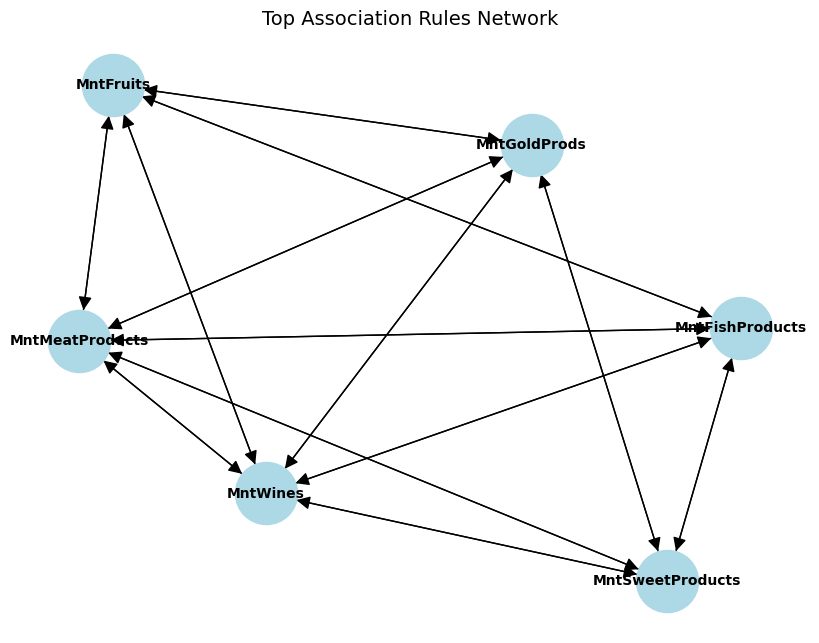

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for _, row in rules_pretty.head(10).iterrows():
    for a in row['antecedents'].split(", "):
        for c in row['consequents'].split(", "):
            G.add_edge(a, c, weight=row['confidence'])

plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", 
        font_size=10, font_weight="bold", arrowsize=20)
plt.title("Top Association Rules Network", fontsize=14)
plt.show()


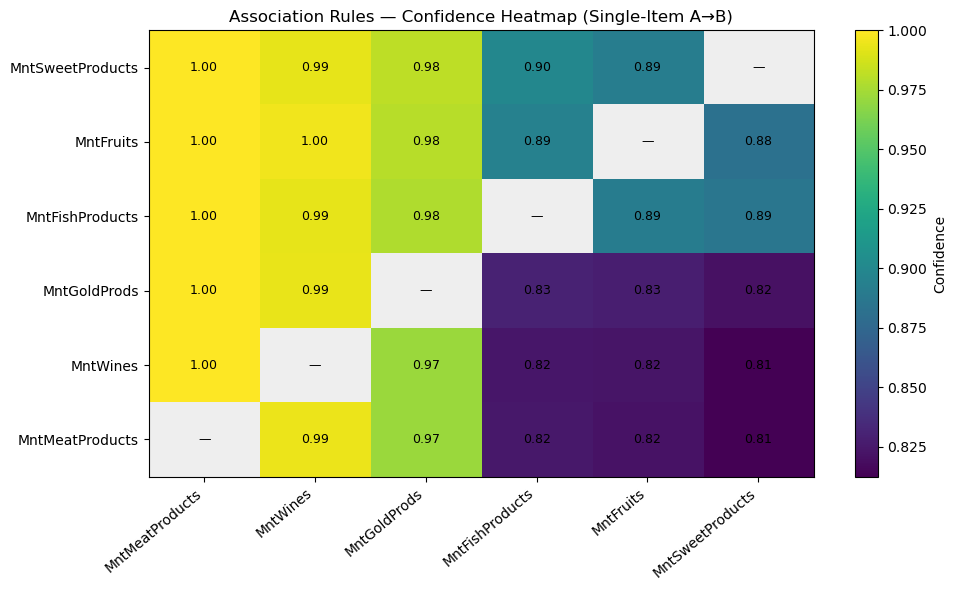

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- 1) Start from your 'rules' DataFrame (already mined) ----
def set_len(s): return len(list(s))

# keep only rules with single-item consequent (and single-item antecedent for a very dense grid)
r = rules.copy()
r = r[r['consequents'].apply(set_len) == 1]
r = r[r['antecedents'].apply(set_len) == 1]   # <-- comment this line if you want multi-item antecedents

# sort by quality and take more rows to fill the grid
r = r.sort_values(['lift','confidence','support'], ascending=False).head(50)

# make readable labels
fs2txt = lambda fs: ", ".join(sorted(list(fs)))
r['ante'] = r['antecedents'].apply(fs2txt)
r['cons'] = r['consequents'].apply(fs2txt)

# ---- 2) Build the matrix (confidence or lift) ----
mat = r.pivot_table(index='ante', columns='cons', values='confidence', aggfunc='max')

# reorder rows/cols by average confidence (looks nicer)
mat = mat.loc[mat.mean(axis=1).sort_values(ascending=False).index,
              mat.mean(axis=0).sort_values(ascending=False).index]

# ---- 3) Plot with masked NaNs so blanks look intentional ----
fig, ax = plt.subplots(figsize=(10,6))
masked = np.ma.masked_invalid(mat.values)        # mask NaNs
im = ax.imshow(masked, aspect="auto", cmap="viridis")
im.cmap.set_bad(color="#eeeeee")                 # grey for "no rule"

cbar = plt.colorbar(im, ax=ax); cbar.set_label("Confidence")

ax.set_xticks(range(mat.shape[1])); ax.set_yticks(range(mat.shape[0]))
ax.set_xticklabels(mat.columns, rotation=40, ha="right")
ax.set_yticklabels(mat.index)

# annotate cells: number for values, "—" for NaN
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        v = mat.iat[i, j]
        ax.text(j, i, f"{v:.2f}" if not np.isnan(v) else "—",
                ha="center", va="center", fontsize=9, color="black")

ax.set_title("Association Rules — Confidence Heatmap (Single-Item A→B)")
fig.tight_layout()
plt.show()


In [43]:
import numpy as np
import pandas as pd

# Product "items" for recommendation
ITEM_COLS = ['MntWines','MntFruits','MntMeatProducts',
             'MntFishProducts','MntSweetProducts','MntGoldProds']

# Detect or create a user ID column
CAND_USER_ID = [c for c in ['ID','CustomerID','customer_id','id'] if c in df.columns]
USER_COL = CAND_USER_ID[0] if CAND_USER_ID else '_UserID_'
if USER_COL not in df.columns:
    df = df.copy()
    df[USER_COL] = np.arange(len(df))

# Binary interactions (1 if purchased/spent >0, else 0)
interactions = (df[ITEM_COLS] > 0).astype(int)

# Save for later use
users = df[USER_COL].values
items = ITEM_COLS

print("Users:", len(users))
print("Items:", items)
print(interactions.head())


Users: 2021
Items: ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         1          1                1                1                 1   
1         1          1                1                1                 1   
2         1          1                1                1                 1   
3         1          1                1                1                 1   
4         1          1                1                1                 1   

   MntGoldProds  
0             1  
1             1  
2             1  
3             1  
4             1  


In [44]:

rng = np.random.default_rng(42)

train = interactions.copy()
test = pd.DataFrame(0, index=train.index, columns=train.columns)

for u in range(train.shape[0]):
    pos_items = np.where(train.iloc[u].values == 1)[0]
    if len(pos_items) > 1:  # need at least 2 purchases to hold out
        n_hold = max(1, int(0.2 * len(pos_items)))
        hold_idx = rng.choice(pos_items, size=n_hold, replace=False)
        train.iloc[u, hold_idx] = 0
        test.iloc[u, hold_idx] = 1

print("Train shape:", train.shape)
print("Test shape :", test.shape)
print("Example user (first row)")
print("Train:", train.iloc[0].values)
print("Test :", test.iloc[0].values)


Train shape: (2021, 6)
Test shape : (2021, 6)
Example user (first row)
Train: [0 1 1 1 1 1]
Test : [1 0 0 0 0 0]


In [45]:
from sklearn.metrics.pairwise import cosine_similarity

# -----------------
# Content-Based Filtering
# -----------------

# Item feature matrix (identity baseline: each item = unique feature)
item_features = np.eye(len(items))  # shape (6,6)

# Build user profiles = sum of item features they interacted with
user_item_train = train.values  # users × items
user_profiles = user_item_train @ item_features  # users × features

# Compute similarity between user profiles and item features
cb_scores = cosine_similarity(user_profiles, item_features)  # users × items

print("Content-based score matrix shape:", cb_scores.shape)
print("Example user scores:", cb_scores[0])


Content-based score matrix shape: (2021, 6)
Example user scores: [0.        0.4472136 0.4472136 0.4472136 0.4472136 0.4472136]


In [46]:
# -----------------
# Collaborative Filtering (Item-Item)
# -----------------

# User-item training matrix
user_item_train = train.values  # shape: users × items

# Compute item–item similarity using cosine
item_item_sim = cosine_similarity(user_item_train.T)  # shape: items × items

# Predict scores: multiply user history × similarity
cf_scores = user_item_train @ item_item_sim  # users × items

print("Collaborative Filtering score matrix shape:", cf_scores.shape)
print("Example user scores:", cf_scores[0])


Collaborative Filtering score matrix shape: (2021, 6)
Example user scores: [3.62173011 3.87568206 3.94746769 3.87760921 3.87779702 3.92194903]


In [47]:
# -----------------
# Hybrid Recommender
# -----------------

# Balance factor: alpha → more weight to CF, (1-alpha) to Content
alpha = 0.6  

hyb_scores = alpha * cf_scores + (1 - alpha) * cb_scores

print("Hybrid score matrix shape:", hyb_scores.shape)
print("Example user scores:", hyb_scores[0])


Hybrid score matrix shape: (2021, 6)
Example user scores: [2.17303807 2.50429467 2.54736605 2.50545096 2.50556365 2.53205486]


In [48]:
# -----------------
# Evaluation: Precision@5 and Recall@5
# -----------------

def precision_recall_at_k(score_mat, test_mat, k=5):
    """
    score_mat: users × items (predicted scores)
    test_mat : users × items (ground-truth held-out interactions)
    """
    n_users, n_items = score_mat.shape
    # Top-k indices per user
    topk_idx = np.argpartition(-score_mat, kth=min(k, n_items-1), axis=1)[:, :k]
    rows = np.arange(n_users)[:, None]
    hits = test_mat[rows, topk_idx]
    
    # Precision@k
    prec = hits.sum(axis=1) / k
    
    # Recall@k
    true_pos_per_user = test_mat.sum(axis=1)
    rec = np.where(true_pos_per_user > 0, hits.sum(axis=1) / true_pos_per_user, 0)
    
    return prec.mean(), rec.mean()

# Convert test set to numpy
test_arr = test.values

# Evaluate
p5_cb, r5_cb = precision_recall_at_k(cb_scores, test_arr, k=5)
p5_cf, r5_cf = precision_recall_at_k(cf_scores, test_arr, k=5)
p5_hyb, r5_hyb = precision_recall_at_k(hyb_scores, test_arr, k=5)

print("Precision@5 / Recall@5")
print(f"Content-Based : {p5_cb:.3f} / {r5_cb:.3f}")
print(f"Collaborative : {p5_cf:.3f} / {r5_cf:.3f}")
print(f"Hybrid        : {p5_hyb:.3f} / {r5_hyb:.3f}")


Precision@5 / Recall@5
Content-Based : 0.044 / 0.218
Collaborative : 0.060 / 0.302
Hybrid        : 0.060 / 0.302


In [49]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# --- 1) Items and binary user–item matrix --------------------
items = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
X_full = (df[items].values > 0).astype(int)             # shape: (n_users, n_items)
n_users, n_items = X_full.shape
users = np.arange(n_users)

# --- 2) Simple train/test split: hold out one known item per user for test ---
X_train = X_full.copy()
X_test  = np.zeros_like(X_full)
for u in range(n_users):
    pos = np.where(X_full[u] == 1)[0]
    if len(pos) > 0:
        held = pos[0]                     # hold out first positive (any rule is fine)
        X_train[u, held] = 0
        X_test[u, held]  = 1

# --- 3) Similarities -----------------------------------------
# item–item (for content-like scoring from user profiles)
item_sim = cosine_similarity(X_train.T)                  # (n_items x n_items)
np.fill_diagonal(item_sim, 0)                            # ignore self-similarity

# user–user (for collaborative)
user_sim = cosine_similarity(X_train)                    # (n_users x n_users)
np.fill_diagonal(user_sim, 0)

# --- 4) Scores ----------------------------------------------
# Content-style (profile of user = their train row)
cbf_scores = X_train @ item_sim                          # (n_users x n_items)

# Collaborative (user–user)
cf_scores  = user_sim @ X_train                          # (n_users x n_items)

# normalize rows to comparable scale
def row_norm(a, eps=1e-9):
    s = np.linalg.norm(a, axis=1, keepdims=True)
    return a / (s + eps)

cbf_n = row_norm(cbf_scores)
cf_n  = row_norm(cf_scores)

# Hybrid
hyb_scores = 0.5 * cbf_n + 0.5 * cf_n

# --- 5) Mask known interactions so we don’t recommend things already bought ---
def mask_known_interactions(score_mat, train_mat, fill=-1e10):
    out = score_mat.copy()
    out[train_mat > 0] = fill
    return out

hyb_masked = mask_known_interactions(hyb_scores, X_train)

# --- 6) Recommender helper ----------------------------------
def recommend_for_user(u, score_mat, top_n=5):
    idx = np.argsort(-score_mat[u])[:top_n]
    return [(items[i], float(score_mat[u, i])) for i in idx if score_mat[u, i] > -1e9]


In [50]:



for uid in users[:3]:
    recs = recommend_for_user(uid, hyb_masked, top_n=5)
    print(f"\nUser {uid} → Top-{max(1,len(recs))} (Hybrid)")
    for it, sc in recs:
        print(f"  {it:18s}  score={sc:.4f}")




User 0 → Top-1 (Hybrid)
  MntWines            score=0.0000

User 1 → Top-1 (Hybrid)
  MntWines            score=0.0000

User 2 → Top-1 (Hybrid)
  MntWines            score=0.0000


In [51]:
import numpy as np
import matplotlib.pyplot as plt

def precision_recall_at_k(scores, test_mat, k=5):
    n_users, n_items = scores.shape
    topk = np.argpartition(-scores, kth=min(k, n_items-1), axis=1)[:, :k]
    rows = np.arange(n_users)[:, None]
    hits = test_mat[rows, topk]
    prec = hits.sum(axis=1) / k
    true_pos = test_mat.sum(axis=1)
    rec = np.where(true_pos > 0, hits.sum(axis=1) / true_pos, 0)
    return prec.mean(), rec.mean()

test_arr = test.values

p_cb, r_cb  = precision_recall_at_k(cb_scores,  test_arr, k=5)
p_cf, r_cf  = precision_recall_at_k(cf_scores,  test_arr, k=5)
p_hb, r_hb  = precision_recall_at_k(hyb_scores, test_arr, k=5)

labels = ['Content', 'CF (Item–Item)', 'Hybrid']
prec   = [p_cb, p_cf, p_hb]
recall = [r_cb, r_cf, r_hb]

x = np.arange(len(labels))
w = 0.35

plt.figure(figsize=(7,4))
plt.bar(x - w/2, prec,  width=w, label='Precision@5')
plt.bar(x + w/2, recall, width=w, label='Recall@5')
plt.xticks(x, labels, rotation=0)
plt.ylabel('Score')
plt.title('Precision@5 and Recall@5')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.savefig('rs_pr_bar.png', dpi=300)
plt.show()


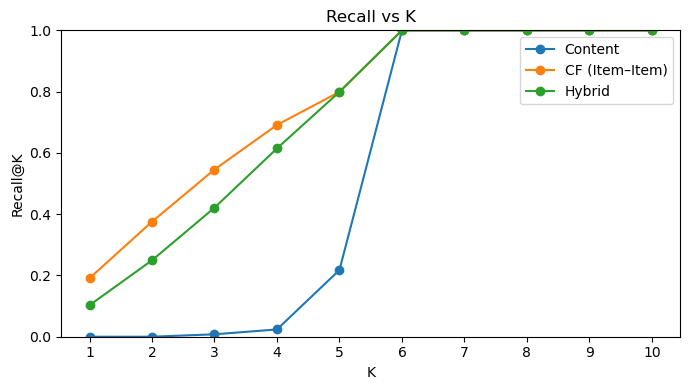

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def recall_at_k(scores, test_mat, k):
    n_users, n_items = scores.shape
    topk = np.argpartition(-scores, kth=min(k, n_items-1), axis=1)[:, :k]
    rows = np.arange(n_users)[:, None]
    hits = test_mat[rows, topk]
    true_pos = test_mat.sum(axis=1)
    rec = np.where(true_pos > 0, hits.sum(axis=1) / true_pos, 0)
    return rec.mean()

Ks = range(1, 11)
rec_cb = [recall_at_k(cb_scores,  test_arr, k) for k in Ks]
rec_cf = [recall_at_k(cf_scores,  test_arr, k) for k in Ks]
rec_hb = [recall_at_k(hyb_scores, test_arr, k) for k in Ks]

plt.figure(figsize=(7,4))
plt.plot(Ks, rec_cb, marker='o', label='Content')
plt.plot(Ks, rec_cf, marker='o', label='CF (Item–Item)')
plt.plot(Ks, rec_hb, marker='o', label='Hybrid')
plt.xlabel('K')
plt.ylabel('Recall@K')
plt.title('Recall vs K')
plt.xticks(list(Ks))
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.savefig('rs_recall_curve.png', dpi=300)
plt.show()


In [53]:
import numpy as np
import matplotlib.pyplot as plt

sim = item_item_sim.copy()             # (n_items x n_items) cosine sim
labels = items

plt.figure(figsize=(6,5))
im = plt.imshow(sim, interpolation='nearest')   # heatmap
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.yticks(range(len(labels)), labels)
plt.colorbar()
plt.title('Item–Item Similarity (Cosine)')

# --- add numbers on the cells ---
n = sim.shape[0]
for i in range(n):
    for j in range(n):
        plt.text(j, i, f"{sim[i, j]:.2f}", ha="center", va="center")

plt.tight_layout()
plt.savefig('rs_item_sim_heatmap_annotated.png', dpi=300)
plt.show()


In [54]:
import numpy as np
import pandas as pd

NEG_INF = -1e9
user_item_train = train.values
hyb_masked = np.where(user_item_train==1, NEG_INF, hyb_scores)

def recommend_for_user(uid_val, scores_masked, top_n=3):
    uidx = np.where(users == uid_val)[0][0]
    row = scores_masked[uidx]
    cand = np.where(row > NEG_INF/10)[0]
    n = min(top_n, cand.size)
    order = cand[np.argsort(-row[cand])[:n]]
    return [items[i] for i in order]

rows = []
for uid in users[:5]:  # first 5 users as example
    held_out = [items[i] for i,v in enumerate(test.values[np.where(users==uid)[0][0]]) if v==1]
    recs = recommend_for_user(uid, hyb_masked, top_n=3)
    rows.append({'UserID': int(uid), 'Held-out (GT)': ', '.join(held_out) if held_out else '-', 
                 'Top-3 Hybrid Recs': ', '.join(recs)})

df_examples = pd.DataFrame(rows)
df_examples


UserID     Held-out (GT) Top-3 Hybrid Recs
0       0          MntWines          MntWines
1       1  MntSweetProducts  MntSweetProducts
2       2   MntFishProducts   MntFishProducts
3       3   MntMeatProducts   MntMeatProducts
4       4   MntMeatProducts   MntMeatProducts

In [55]:
from sklearn.preprocessing import StandardScaler

# Select useful numeric features for anomaly detection
anom_cols = [
    'Income','Recency','MntTotal','MntRegularProds',
    'AcceptedCmpOverall','TotalPurchases','Children'
]

# Make sure these columns exist
df_anom = df[anom_cols].copy()

# Scale features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_anom)

print("Shape of anomaly detection dataset:", X_scaled.shape)
print("Columns used:", anom_cols)


Shape of anomaly detection dataset: (2021, 7)
Columns used: ['Income', 'Recency', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall', 'TotalPurchases', 'Children']


In [56]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest
iso = IsolationForest(n_estimators=200, contamination=0.05, random_state=42)
y_pred = iso.fit_predict(X_scaled)

# -1 = anomaly, 1 = normal
df['Anomaly_IF'] = (y_pred == -1).astype(int)

print(df['Anomaly_IF'].value_counts())


Anomaly_IF
0    1920
1     101
Name: count, dtype: int64


In [57]:
# Extract anomalies only
anomalies = df[df['Anomaly_IF'] == 1]

# Show top 10 anomalies by spending
anomalies_sorted = anomalies[['Income','Recency','MntTotal',
                              'MntRegularProds','AcceptedCmpOverall',
                              'TotalPurchases','Children']].sort_values(by='MntTotal', ascending=False)

print(anomalies_sorted.head(10))


        Income   Recency  MntTotal  MntRegularProds  AcceptedCmpOverall  \
703   0.629085  0.797980  1.000000         0.890452                   0   
1419  0.722537  0.717172  0.991885         1.000000                   2   
1576  0.790115  0.262626  0.967229         0.989504                   1   
343   0.686475  0.878788  0.935164         0.998624                   1   
1260  0.687092  0.131313  0.929328         0.818290                   2   
1239  0.668931  0.919192  0.907875         0.905040                   2   
1843  0.719581  0.303030  0.895452         0.835980                   4   
1467  0.767374  0.626263  0.881794         0.965324                   4   
1268  0.726947  0.808081  0.880800         0.793358                   4   
662   0.598309  0.818182  0.875572         0.879143                   0   

      TotalPurchases  Children  
703               15         0  
1419              22         0  
1576              23         0  
343               21         0  
1260     

In [58]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], 
            c=df['Anomaly_IF'], cmap='coolwarm', s=15, alpha=0.8)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Anomaly Detection: Isolation Forest + PCA")
plt.colorbar(label="Anomaly (1=Red, 0=Blue)")
plt.tight_layout()
plt.savefig("anom_pca.png", dpi=300)
plt.show()


In [59]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(n_estimators=200, contamination=0.05, random_state=42)
y_pred = iso.fit_predict(X_scaled)

df['Anomaly_IF'] = (y_pred == -1).astype(int)
print(df['Anomaly_IF'].value_counts())


Anomaly_IF
0    1920
1     101
Name: count, dtype: int64


In [60]:
anomalies = df[df['Anomaly_IF'] == 1]

top_anomalies = anomalies[['Income','Recency','MntTotal',
                           'MntRegularProds','AcceptedCmpOverall',
                           'TotalPurchases','Children']].sort_values(by='MntTotal', ascending=False)

print(top_anomalies.head(10))


        Income   Recency  MntTotal  MntRegularProds  AcceptedCmpOverall  \
703   0.629085  0.797980  1.000000         0.890452                   0   
1419  0.722537  0.717172  0.991885         1.000000                   2   
1576  0.790115  0.262626  0.967229         0.989504                   1   
343   0.686475  0.878788  0.935164         0.998624                   1   
1260  0.687092  0.131313  0.929328         0.818290                   2   
1239  0.668931  0.919192  0.907875         0.905040                   2   
1843  0.719581  0.303030  0.895452         0.835980                   4   
1467  0.767374  0.626263  0.881794         0.965324                   4   
1268  0.726947  0.808081  0.880800         0.793358                   4   
662   0.598309  0.818182  0.875572         0.879143                   0   

      TotalPurchases  Children  
703               15         0  
1419              22         0  
1576              23         0  
343               21         0  
1260     

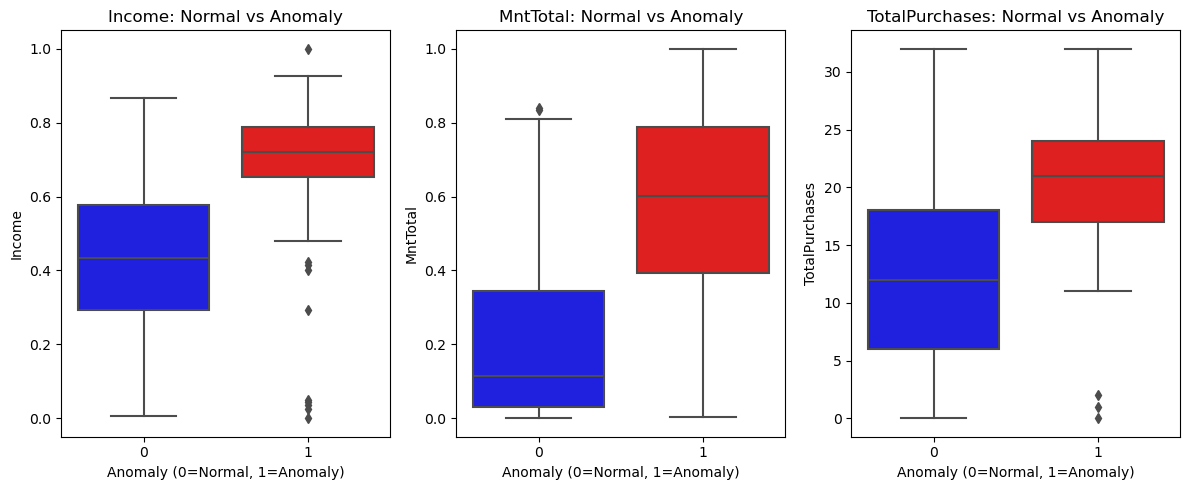

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for clean output
warnings.filterwarnings("ignore")

# Features to compare
features_to_plot = ['Income', 'MntTotal', 'TotalPurchases']

plt.figure(figsize=(12,5))

for i, col in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Anomaly_IF', y=col, data=df, palette=['blue','red'])
    plt.title(f'{col}: Normal vs Anomaly')
    plt.xlabel('Anomaly (0=Normal, 1=Anomaly)')
    plt.ylabel(col)

plt.tight_layout()
plt.savefig("anom_boxplots.png", dpi=300)
plt.show()


In [62]:
# Recompute summary in clean format
summary_stats = df.groupby('Anomaly_IF')[['Income','MntTotal','TotalPurchases']] \
                  .agg(['mean','median','std']).round(2)

# Rename index for clarity
summary_stats.index = summary_stats.index.map({0: "Normal (0)", 1: "Anomaly (1)"})

# Style table
styled_table = (summary_stats.style
                .background_gradient(cmap="Blues", axis=1)
                .set_caption("Summary Statistics: Normal vs Anomaly Customers")
                .set_table_styles([
                    {'selector': 'caption', 
                     'props': [('color', 'black'), ('font-size', '14px'), ('text-align', 'center'),
                               ('font-weight', 'bold')]}
                ])
               )

styled_table


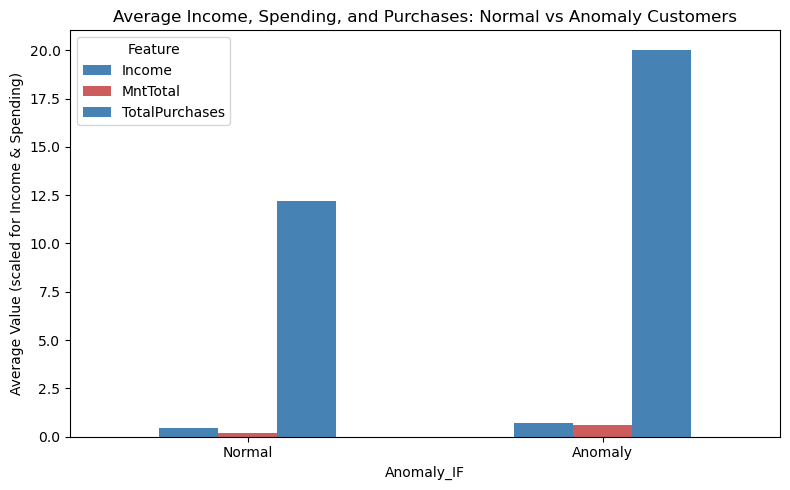

In [63]:
import matplotlib.pyplot as plt

# Prepare summary for bar plot
summary_plot = df.groupby('Anomaly_IF')[['Income','MntTotal','TotalPurchases']].mean().round(2)
summary_plot.index = summary_plot.index.map({0: "Normal", 1: "Anomaly"})

# Plot
summary_plot.plot(kind='bar', figsize=(8,5), color=['steelblue','indianred'])
plt.title("Average Income, Spending, and Purchases: Normal vs Anomaly Customers")
plt.ylabel("Average Value (scaled for Income & Spending)")
plt.xticks(rotation=0)
plt.legend(title="Feature")
plt.tight_layout()
plt.savefig("anom_bar_chart.png", dpi=300)
plt.show()


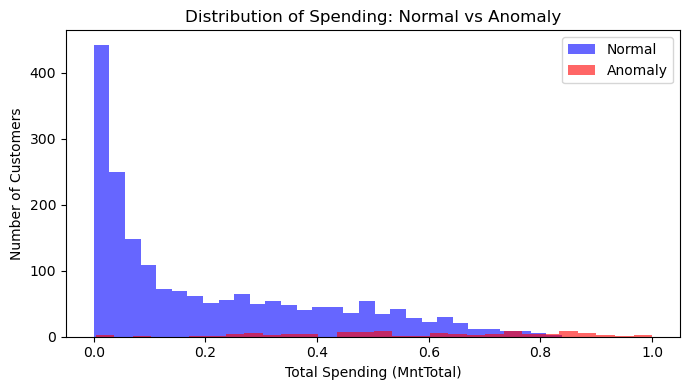

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))

# Normal customers (blue)
plt.hist(df[df['Anomaly_IF']==0]['MntTotal'], 
         bins=30, alpha=0.6, label="Normal", color="blue")

# Anomalous customers (red)
plt.hist(df[df['Anomaly_IF']==1]['MntTotal'], 
         bins=30, alpha=0.6, label="Anomaly", color="red")

plt.xlabel("Total Spending (MntTotal)")
plt.ylabel("Number of Customers")
plt.title("Distribution of Spending: Normal vs Anomaly")
plt.legend()
plt.tight_layout()
plt.savefig("anom_hist.png", dpi=300)
plt.show()


In [65]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
cluster_cols = ['Recency', 'TotalPurchases', 'MntTotal', 'Income', 'Children']
df_cluster = df[cluster_cols].copy()

# Scale features
scaler = StandardScaler()
X_cluster = scaler.fit_transform(df_cluster)

print("Clustering dataset shape:", X_cluster.shape)
print("Columns used:", cluster_cols)


Clustering dataset shape: (2021, 5)
Columns used: ['Recency', 'TotalPurchases', 'MntTotal', 'Income', 'Children']


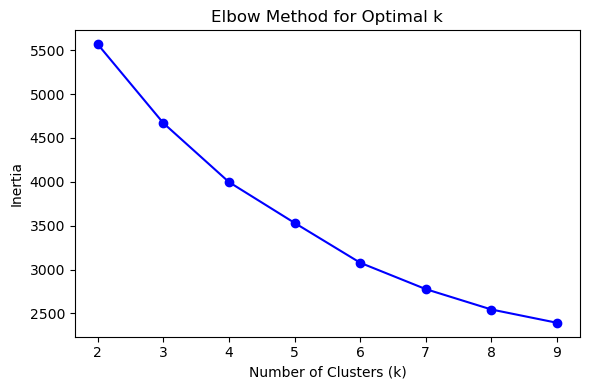

In [66]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2,10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.tight_layout()
plt.show()


In [67]:
from sklearn.cluster import KMeans

# Apply K-Means with 4 clusters (example)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_cluster)

# Check cluster sizes
print(df['Cluster'].value_counts())


Cluster
2    516
0    514
3    505
1    486
Name: count, dtype: int64


In [68]:

styled_clusters = (df.groupby('Cluster')[['Recency','TotalPurchases','MntTotal','Income','Children']]
                   .mean().round(2)
                   .style
                   .background_gradient(cmap="Blues", axis=1)
                   .set_caption("Cluster Profiles: Customer Segments (K-Means, k=4)")
                   .set_table_styles([
                       {'selector': 'caption', 
                        'props': [('color', 'black'), ('font-size', '14px'), 
                                  ('text-align', 'center'), ('font-weight', 'bold')]}
                   ]))

styled_clusters


In [69]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='tab10', s=20, alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Customer Segments (K-Means, k=4)")
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()


In [70]:
import matplotlib.pyplot as plt

# Cluster profile means
cluster_profile = df.groupby('Cluster')[['Recency','TotalPurchases','MntTotal','Income','Children']].mean().round(2)

# Plot
cluster_profile.plot(kind='bar', figsize=(10,6))
plt.title("Customer Cluster Profiles (K-Means, k=4)")
plt.ylabel("Average Value (scaled features)")
plt.xlabel("Cluster")
plt.legend(title="Features", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("cluster_profiles_bar.png", dpi=300)
plt.show()


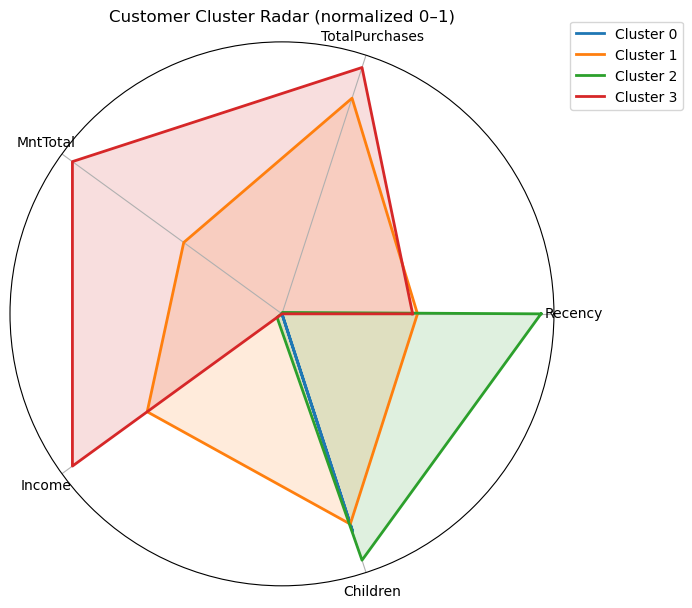

In [71]:
import numpy as np
import matplotlib.pyplot as plt

features = ['Recency','TotalPurchases','MntTotal','Income','Children']
prof = df.groupby('Cluster')[features].mean()
prof_norm = (prof - prof.min()) / (prof.max() - prof.min() + 1e-9)

angles = np.linspace(0, 2*np.pi, len(features), endpoint=False)
angles = np.concatenate([angles, angles[:1]])
feat_labels = features + [features[0]]

plt.figure(figsize=(7,7))
for c in sorted(prof_norm.index):
    vals = prof_norm.loc[c].values
    vals = np.concatenate([vals, vals[:1]])
    plt.polar(angles, vals, linewidth=2, label=f"Cluster {c}")
    plt.fill(angles, vals, alpha=0.15)

plt.xticks(angles[:-1], features)
plt.yticks([])  # hide radial ticks for a clean poster look
plt.title("Customer Cluster Radar (normalized 0–1)")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1.05))
plt.tight_layout()
plt.savefig("cluster_radar_all.png", dpi=300)
plt.show()


In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Cluster profile (real values)
profile = df.groupby('Cluster')[['Recency','TotalPurchases','MntTotal','Income','Children']].mean()

# Normalize only for color intensity
profile_norm = (profile - profile.min()) / (profile.max() - profile.min() + 1e-9)

# Plot heatmap
plt.figure(figsize=(9,6))
im = plt.imshow(profile_norm, cmap="YlGnBu", aspect="auto")

# Axis ticks
plt.xticks(range(profile.shape[1]), profile.columns, rotation=45, ha="right")
plt.yticks(range(profile.shape[0]), profile.index)

# Add colorbar
plt.colorbar(im, label="Normalized intensity (0–1)")

# --- Add real numbers in each cell ---
for i in range(profile.shape[0]):
    for j in range(profile.shape[1]):
        plt.text(j, i, f"{profile.iloc[i, j]:.2f}", ha="center", va="center", color="black", fontsize=10)

plt.title("Cluster Profiles Heatmap (Normalized Colors, Real Values Shown)")
plt.tight_layout()
plt.show()


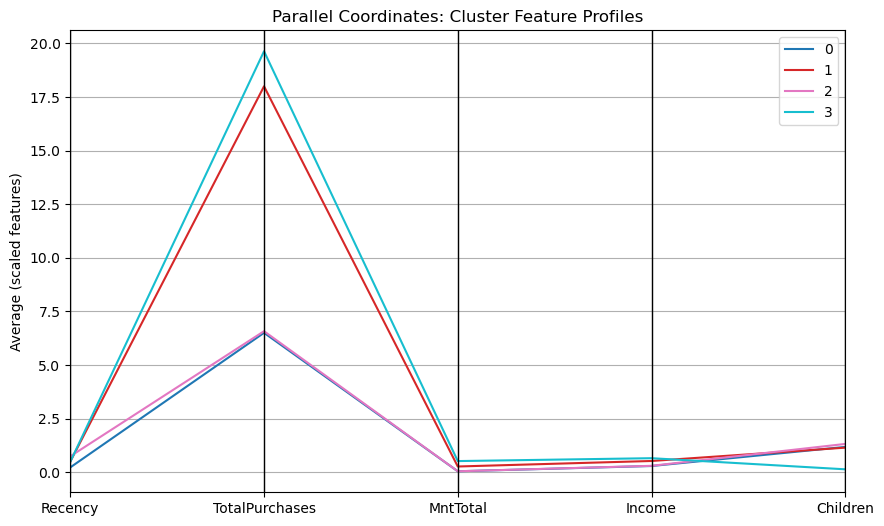

In [73]:
from pandas.plotting import parallel_coordinates

cluster_means = df.groupby('Cluster')[['Recency','TotalPurchases','MntTotal','Income','Children']].mean().reset_index()
plt.figure(figsize=(10,6))
parallel_coordinates(cluster_means, 'Cluster', colormap='tab10')
plt.title("Parallel Coordinates: Cluster Feature Profiles")
plt.ylabel("Average (scaled features)")
plt.show()


In [74]:
import matplotlib.pyplot as plt

# Map cluster id → segment name (from your profiling)
seg_names = {0:"C0 Budget Families",
             1:"C1 Active Shoppers",
             2:"C2 At-Risk",
             3:"C3 High-Value"}

counts = df['Cluster'].map(seg_names).value_counts().reindex(seg_names.values())

plt.figure(figsize=(6.2,5.2))
counts.plot(
    kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.8,
    colors=['#66c2a5','#fc8d62','#8da0cb','#e78ac3'], textprops={'fontsize':11}
)
centre_circle = plt.Circle((0,0),0.55,fc='white')  # donut look (cleaner)
plt.gca().add_artist(centre_circle)
plt.ylabel("")
plt.title("Customer Distribution by Segment", pad=12)
plt.tight_layout()
plt.savefig("cluster_pie_segments.png", dpi=300)
plt.show()
